In [4]:
import numpy as np
import matplotlib.pyplot as plt
import functions as f
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns

In [2]:
def get_means(hist1, hist2):
    mediaHist1 = np.mean(hist1, axis=0)
    mediaHist2 = np.mean(hist2, axis=0)
    return mediaHist1, mediaHist2

In [18]:
def plot_hist(hist1, hist2, save=False, labels=['',''], figname=""):
    fontd={"fontsize":13}
    
    fig, ax = plt.subplots(figsize=(4.7,3.5))
    m1, m2 = get_means(hist1, hist2)
    ax.plot(m1, label=labels[0],ls='-')
    ax.plot(m2, label=labels[1],ls=':')
    ax.set_xlabel("Gerações",fontdict=fontd)
    ax.set_ylabel("SSE",fontdict=fontd)    
    plt.legend()
    plt.tight_layout()
    
    if save:
        plt.savefig("figuras/hist_{}".format(figname))
    plt.show()
    plt.close()
    plt.clf()
    
def plot_clusters(X, clusters, features, save=False, figname=""):
    # Pega os clusters
    fig, ax = plt.subplots()
    
    # numero de clusters
    n_cls = len(np.unique(clusters))
    cores = ['red', 'blue', 'green']
    
    for i in range(n_cls):
        # clusters
        ax.scatter(X[clusters == i, 0], X[clusters == i, 1], s=100, c=cores[i], marker='.', label='{}'.format(i))

    # centroids
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    plt.legend()   
    plt.tight_layout()
    if save:
        plt.savefig("figuras/cls_{}".format(figname))
    plt.show()
    plt.close()

# Iris dataset

In [50]:
iris = pd.read_csv("iris.data", header=None)
features = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
iris.columns = features

In [98]:
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Convergência

In [6]:
# carregamento das convergências
hist_iris_de = np.load("results/DE/best_historico_DE_iris.npy")
hist_iris_deK = np.load("results/DE_Kmeans/best_historico_DE_kmeans_iris.npy")
hist_iris_es = np.load("results/ES/best_historico_ES_iris.npy")
hist_iris_esK = np.load("results/ES_KMeans/best_historico_es_kmeans_iris.npy")

### DE vs DE + KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


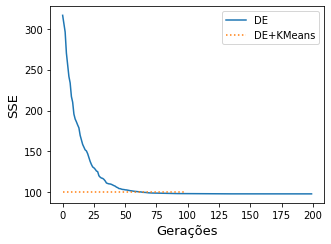

<Figure size 432x288 with 0 Axes>

In [19]:
plot_hist(hist_iris_de, hist_iris_deK, labels=["DE", "DE+KMeans"], save=True, figname="de_iris.eps")

### ES vs ES+KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


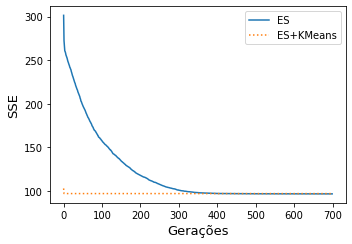

<Figure size 432x288 with 0 Axes>

In [11]:
plot_hist(hist_iris_es, hist_iris_esK, labels=["ES", "ES+KMeans"], save=True, figname="es_iris.eps")

## Clusterização

In [63]:
## iris
# de
best_iris_de = np.load("results/DE/best_exp_DE_iris.npy")
best_iris_deK = np.load("results/DE_Kmeans/best_exp_DE_kmeans_iris.npy")
# es
best_iris_es = np.load("results/ES/best_exp_ES_iris.npy")
best_iris_esK = np.load("results/ES_KMeans/best_exp_es_kmeans_iris.npy")

## wine

#breast cancer


**Clusters reais**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


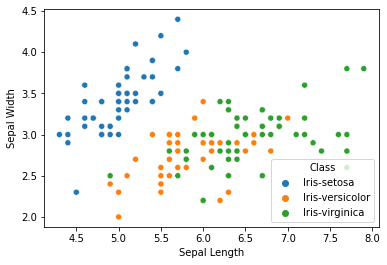

In [58]:
fig, ax = plt.subplots()
sns.scatterplot(x=features[0], y=features[1], data=iris, hue='Class', ax=ax)
plt.savefig("figuras/realcls_iris.eps")

### DE

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


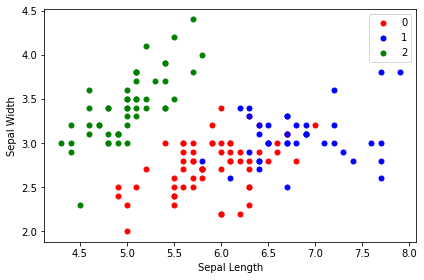

In [61]:
X_iris = iris.values[:, [0,1,2,3]]
pred_clusters = f.predict(X_iris, best_iris_de)
plot_clusters(X_iris, pred_clusters, features=features[0:2], save=True, figname="iris_de.eps")

### DE + KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


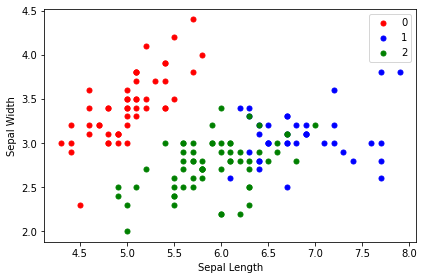

In [62]:
X_iris = iris.values[:, [0,1,2,3]]
pred_clusters = f.predict(X_iris, best_iris_deK)
plot_clusters(X_iris, pred_clusters, features=features[0:2], save=True, figname="iris_de_k.eps")

### ES

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


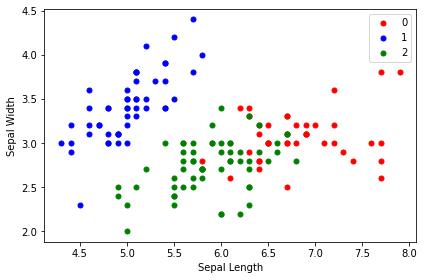

In [64]:
pred_clusters = f.predict(X_iris, best_iris_es)
plot_clusters(X_iris, pred_clusters, features=features[0:2], save=True, figname="es_iris.eps")

### ES+KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


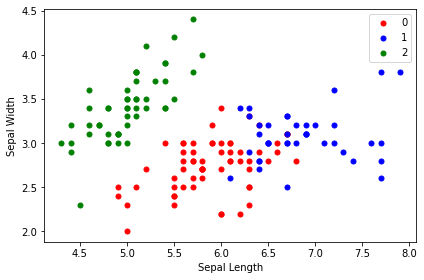

In [65]:
pred_clusters = f.predict(X_iris, best_iris_esK)
plot_clusters(X_iris, pred_clusters, features=features[0:2], save=True, figname="es_iris_k.eps")

# Wine dataset

In [77]:
wine_dataset = pd.read_csv("wine.data", header=None)
wine_features = ["Alcohol","Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
"Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline","Unknown"]
wine_dataset.columns = wine_features
# processamento dos dados
X_wine = wine_dataset[wine_features[1:]].values
scaler_wine = MinMaxScaler()
X_wine = scaler_wine.fit_transform(X_wine)

In [100]:
len(wine_features)

14

In [106]:
np.min(wine_dataset.values), np.max(wine_dataset.values)

(0.13, 1680.0)

In [99]:
wine_dataset.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Unknown
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Convergência

In [12]:
# carregamento das convergências
hist_wine_de = np.load("results/DE/best_historico_DE_wine.npy")
hist_wine_deK = np.load("results/DE_Kmeans/best_historico_DE_Kmeans_wine.npy")
hist_wine_es = np.load("results/ES/best_historico_ES_wine.npy")
hist_wine_esK = np.load("results/ES_KMeans/best_historico_es_kmeans_wine.npy")

### DE vs DE+KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


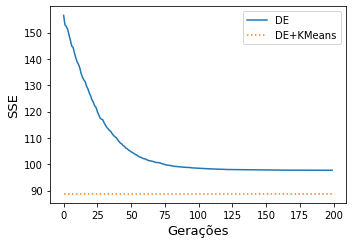

<Figure size 432x288 with 0 Axes>

In [13]:
plot_hist(hist_wine_de, hist_wine_deK, labels=["DE", "DE+KMeans"], save=True, figname="de_wine.eps")

### ES vs ES+KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


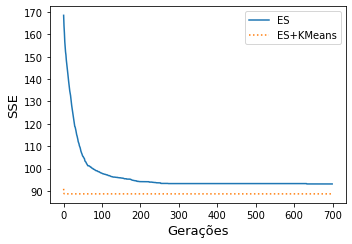

<Figure size 432x288 with 0 Axes>

In [14]:
plot_hist(hist_wine_es, hist_wine_esK, labels=["ES", "ES+KMeans"], save=True, figname="es_wine.eps")

## Clusterização

**Clusters reais**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


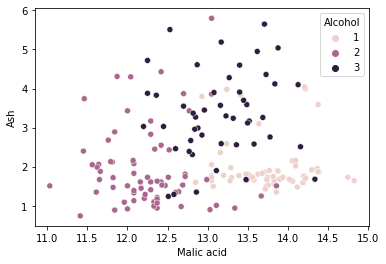

In [81]:
fig, ax = plt.subplots()
sns.scatterplot(x=wine_features[1], y=wine_features[2], data=wine_dataset, hue='Alcohol', ax=ax)
plt.savefig("figuras/realcls_wine.eps")

In [82]:
best_de_wine = np.load("results/DE/best_exp_DE_wine.npy")
best_de_wineK = np.load("results/DE_Kmeans/best_exp_DE_Kmeans_wine.npy")

best_es_wine = np.load("results/ES/best_exp_ES_wine.npy")
best_es_wineK = np.load("results/ES_KMeans/best_exp_es_kmeans_wine.npy")

### DE

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


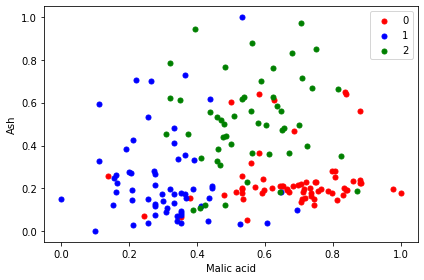

In [83]:
pred_clusters = f.predict(X_wine, best_de_wine)
plot_clusters(X_wine, pred_clusters, 
              features=[wine_features[1], wine_features[2]], save=True, figname="wine_de.eps")

### DE + KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


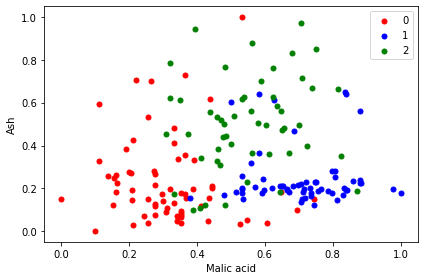

In [84]:
pred_clusters = f.predict(X_wine, best_de_wineK)
plot_clusters(X_wine, pred_clusters, 
              features=[wine_features[1], wine_features[2]], save=True, figname="wine_de_k.eps")

### ES

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


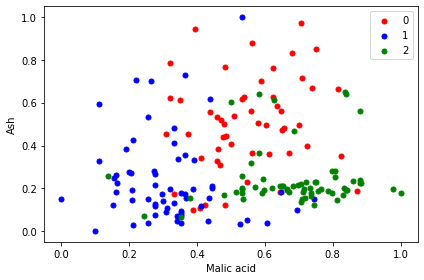

In [85]:
pred_clusters = f.predict(X_wine, best_es_wine)
plot_clusters(X_wine, pred_clusters, 
              features=[wine_features[1], wine_features[2]], save=True, figname="wine_es.eps")

### ES + KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


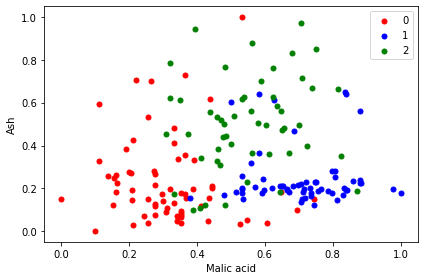

In [86]:
pred_clusters = f.predict(X_wine, best_de_wineK)
plot_clusters(X_wine, pred_clusters, 
              features=[wine_features[1], wine_features[2]], save=True, figname="wine_de_k.eps")

# Breast Cancer

In [ ]:
breast_cancer = pd.read_csv("breast_cancer.csv")
breast_features = breast_cancer.columns
breast_cancer.head()

In [109]:
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [108]:
np.min(breast_cancer[breast_features[2:32]].values), np.max(breast_cancer[breast_features[2:32]].values)

(0.0, 4254.0)

In [ ]:
X_breast = breast_cancer[breast_features[2:32]].values
scaler_breast = MinMaxScaler()
X_breast = scaler_breast.fit_transform(X_breast)

## Convergência

In [15]:
# carregamento das convergências
hist_breast_de = np.load("results/DE/best_historico_DE_breast.npy")
hist_breast_deK = np.load("results/DE_Kmeans/best_historico_DE_Kmeans_breast.npy")
hist_breast_es = np.load("results/ES/best_historico_ES_breast.npy")
hist_breast_esK = np.load("results/ES_KMeans/best_historico_es_kmeans_breast.npy")

### DE vs DE+KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


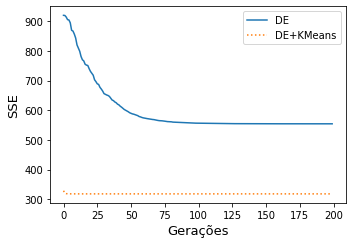

<Figure size 432x288 with 0 Axes>

In [16]:
plot_hist(hist_breast_de, hist_breast_deK, labels=["DE", "DE+KMeans"], save=True, figname="de_breast.eps")

### ES vs ES+KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


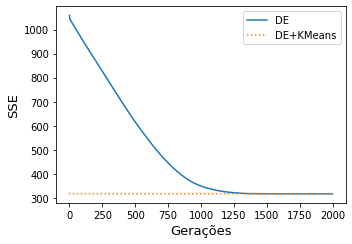

<Figure size 432x288 with 0 Axes>

In [17]:
plot_hist(hist_breast_es, hist_breast_esK, labels=["DE", "DE+KMeans"], save=True, figname="es_breast.eps")

## Clusterização

**Clusters reais**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


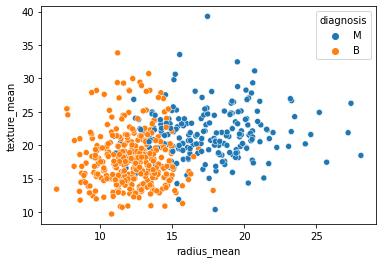

In [92]:
fig, ax = plt.subplots()
sns.scatterplot(x=breast_features[2], y=breast_features[3], data=breast_cancer, hue='diagnosis',ax=ax)
plt.savefig("figuras/realcls_breast.eps")

In [93]:
best_de_breast = np.load("results/DE/best_exp_DE_breast.npy")
best_de_breastK = np.load("results/DE_Kmeans/best_exp_DE_Kmeans_breast.npy")

best_es_breast = np.load("results/ES/best_exp_ES_breast.npy")
best_es_breastK = np.load("results/ES_KMeans/best_exp_es_kmeans_breast.npy")

### DE

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


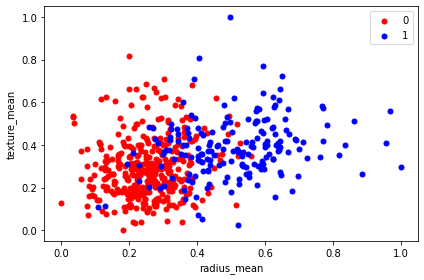

In [94]:
pred_clusters = f.predict(X_breast, best_de_breast)
plot_clusters(X_breast, pred_clusters, 
              features=[breast_features[2], breast_features[3]], save=True, figname="breast_de.eps")

### DE + KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


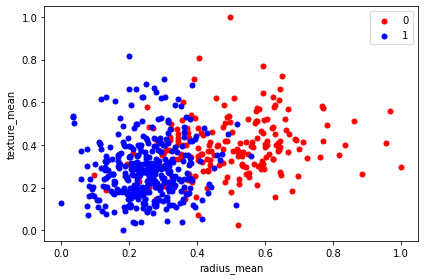

In [95]:
pred_clusters = f.predict(X_breast, best_de_breastK)
plot_clusters(X_breast, pred_clusters, 
              features=[breast_features[2], breast_features[3]], save=True, figname="breast_de_k.eps")

### ES

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


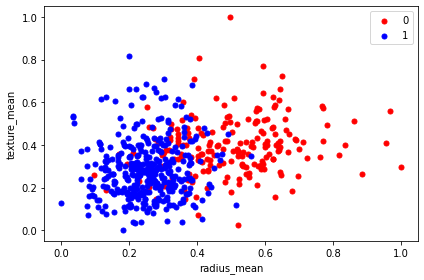

In [96]:
pred_clusters = f.predict(X_breast, best_es_breast)
plot_clusters(X_breast, pred_clusters, 
              features=[breast_features[2], breast_features[3]], save=True, figname="breast_es.eps")

### ES + KMeans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


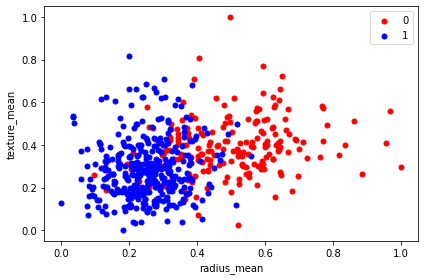

In [97]:
pred_clusters = f.predict(X_breast, best_es_breastK)
plot_clusters(X_breast, pred_clusters, 
              features=[breast_features[2], breast_features[3]], save=True, figname="breast_es_k.eps")

In [15]:
hist_breast = [hist_breast_de, hist_breast_deK, hist_breast_es, hist_breast_esK]
hist_wine = [hist_wine_de, hist_wine_deK, hist_wine_es, hist_wine_esK]
hist_iris =[hist_iris_de, hist_iris_deK, hist_iris_es, hist_iris_esK]

In [13]:
def medias_hist(hist):
    melhores = [h[-1] for h in hist]
    return np.mean(melhores)

In [22]:
modelos = ["DE","DE+K","ES", "ES+K"]
bases = ["Iris","Wine", "Breast Cancer"]
hists = [hist_iris, hist_wine, hist_breast]

In [31]:
for i, b in enumerate(bases):
    print("\n\n-------{}-------".format(b))
    hist = hists[i]
    for j in range(len(modelos)):
        media = medias_hist(hist[j])
        print ("{} - {:.3f}".format(modelos[j], media))



-------Iris-------
DE - 98.032
DE+K - 99.759
ES - 96.809
ES+K - 97.134


-------Wine-------
DE - 97.701
DE+K - 88.725
ES - 93.128
ES+K - 88.696


-------Breast Cancer-------
DE - 554.170
DE+K - 318.183
ES - 316.971
ES+K - 317.845
